In [1]:
import IPython.core.display as di
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ignore code when downloaded as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# Read file
df = pd.read_csv('Downloads/liver_data_inf560.csv',header = 0, na_values = 'NaN')

dtypes: float64(60), int64(23), object(76)

In [2]:
#Basic translation
df = df.replace("Unknown", np.nan) #Replace 'Unknown; with NaN for further processing
df = df.replace(998, np.nan) #998 means Unknown
df = df.replace(997, np.nan) #997 means N/A
df = df.replace(996, np.nan) #996 means N/A not sure?

In [3]:
#According to LIVER_FORMATC_LOOKUP
column_name = 'FUNC_STAT_TRR'
df.loc[df.FUNC_STAT_TRR == 1.0, column_name] = 10
df.loc[df.FUNC_STAT_TRR == 2.0, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 3.0, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 2010, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 2020, column_name] = 2
df.loc[df.FUNC_STAT_TRR == 2030, column_name] = 3
df.loc[df.FUNC_STAT_TRR == 2040, column_name] = 4
df.loc[df.FUNC_STAT_TRR == 2050, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 2060, column_name] = 6
df.loc[df.FUNC_STAT_TRR == 2070, column_name] = 7
df.loc[df.FUNC_STAT_TRR == 2080, column_name] = 8
df.loc[df.FUNC_STAT_TRR == 2090, column_name] = 9
df.loc[df.FUNC_STAT_TRR == 2100, column_name] = 10
df.loc[df.FUNC_STAT_TRR == 4010, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 4020, column_name] = 2
df.loc[df.FUNC_STAT_TRR == 4030, column_name] = 3
df.loc[df.FUNC_STAT_TRR == 4040, column_name] = 4
df.loc[df.FUNC_STAT_TRR == 4050, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 4060, column_name] = 6
df.loc[df.FUNC_STAT_TRR == 4070, column_name] = 7
df.loc[df.FUNC_STAT_TRR == 4080, column_name] = 8
df.loc[df.FUNC_STAT_TRR == 4090, column_name] = 9
df.loc[df.FUNC_STAT_TRR == 4100, column_name] = 10

In [4]:
#numeralization -> We only use MELD, and we have age, so delete age_group
#df['AGE_GROUP'] = df['AGE_GROUP'].replace('A',1)
#df['AGE_GROUP'] = df['AGE_GROUP'].replace('P',0)
#df[['AGE_GROUP']].head(5)
df.drop(['AGE_GROUP'], axis = 1, inplace = True)

In [5]:
#numeralization
df =  df.replace('M', 0) #'M' means male
df =  df.replace('F', 1) #'F' means female

In [6]:
#df[df.END_STAT].between(6101, 6199, inclusive=True)
#df[['END_STAT']].query('6101 <= END_STAT <= 6199') #negative meld score
#df[df['END_STAT']==6999] #Inactive means Unknown, cuz the patients records not updated
#df[['END_STAT']].query('6010 <= END_STAT <= 6012') Don't know what status1 status2 mean..
# def END_STAT_CALCULATOR(x):
#     if x>=6101 and x<=6200:
#         return 6200-x
#     elif x>=6201 and x<=6299:
#         return x-6200
#     elif x==6999:
#         return np.nan

In [7]:
#df['END_STAT'] = df.END_STAT.apply(END_STAT_CALCULATOR)

In [8]:
#one hot encoding
pd.get_dummies(df['ABO'],prefix='BLOOD_TYPE')
df = pd.concat([df, pd.get_dummies(df['ABO'],prefix='BLOOD_TYPE')], axis=1)
df.drop(['ABO'], axis=1, inplace=True)
#df[['BLOOD_TYPE_A','BLOOD_TYPE_A1','BLOOD_TYPE_A2','BLOOD_TYPE_B','BLOOD_TYPE_O','BLOOD_TYPE_AB','BLOOD_TYPE_A1B','BLOOD_TYPE_A2B']].head(5)

In [9]:
#one hot encoding
pd.get_dummies(df['ABO_DON'],prefix='DON_BLOOD_TYPE')
df = pd.concat([df, pd.get_dummies(df['ABO_DON'],prefix='DON_BLOOD_TYPE')], axis=1)
df.drop(['ABO_DON'], axis=1, inplace=True)
#df[['DON_BLOOD_TYPE_A','DON_BLOOD_TYPE_A1','DON_BLOOD_TYPE_A2','DON_BLOOD_TYPE_B','DON_BLOOD_TYPE_O','DON_BLOOD_TYPE_AB','DON_BLOOD_TYPE_A1B','DON_BLOOD_TYPE_A2B']].head(5)

In [10]:
#one hot encoding
df['ETHCAT'] = df['ETHCAT'].replace(1,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(2,'Black')
df['ETHCAT'] = df['ETHCAT'].replace(4,'Hispanic')
df['ETHCAT'] = df['ETHCAT'].replace(5,'Asian')
df['ETHCAT'] = df['ETHCAT'].replace(6,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(7,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(9,'Multiracial')
pd.get_dummies(df['ETHCAT'],prefix='ETHCAT')
df = pd.concat([df, pd.get_dummies(df['ETHCAT'],prefix='ETHCAT')], axis=1)
df.drop(['ETHCAT'], axis=1, inplace=True)

In [11]:
#one hot encoding
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(1,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(2,'Black')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(4,'Hispanic')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(5,'Asian')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(6,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(7,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(9,'Multiracial')
pd.get_dummies(df['ETHCAT_DON'],prefix='ETHCAT_DON')
df = pd.concat([df, pd.get_dummies(df['ETHCAT_DON'],prefix='ETHCAT_DON')], axis=1)
df.drop(['ETHCAT_DON'], axis=1, inplace=True)

In [12]:
#numeralization
df.loc[df['DON_TY'] == 'C','DON_TY'] = 0  
df.loc[df['DON_TY'] == 'L','DON_TY'] = 1 

In [13]:
#numeralization
def replaceEXC_HCC(hcc):
    if hcc == 'non-HCC':
        hcc = 1
    elif hcc == "HCC":
        hcc = 0
    elif hcc == "HBL":
        hcc = 1
    return hcc
df['EXC_HCC'] = df.EXC_HCC.apply(replaceEXC_HCC)

In [14]:
#numeralization
df =  df.replace('N', 0) #'N' means No
df =  df.replace('No', 0) #'No' means No
df =  df.replace('Y', 1) #'Y' means Yes
df =  df.replace('Yes', 1) #'Yes' means Yes

In [15]:
#DATA_TRANSPLANT,DATA_WAITLIST, LIST_MELD, TX_MELD have all the same values for one column
df.drop(['DATA_TRANSPLANT'],axis=1,inplace=True) 
df.drop(['DATA_WAITLIST'],axis=1,inplace=True) 
df.drop(['LIST_MELD'],axis=1,inplace=True) 
df.drop(['TX_MELD'],axis=1,inplace=True) 

In [16]:
#numeralization
df =  df.replace(['PD', 'ND', 'I', 'C', 'U'], np.nan) 
df =  df.replace('P', 1)

In [17]:
#numeralization
df['TXLIV'] =  df['TXLIV'].replace('W', 1)
df['TXLIV'] =  df['TXLIV'].replace('S', 0)

In [18]:
#numeralization
df['PX_STAT'] =  df['PX_STAT'].replace(['R', 'D'], 0)
df['PX_STAT'] =  df['PX_STAT'].replace('A', 1)
df['PX_STAT'] =  df['PX_STAT'].replace('L', np.nan)

In [19]:
#Highly relevant -> Delete those using PELD
#df.drop(['FINAL_MELD_OR_PELD'],axis=1,inplace=True)
df = df[df['FINAL_MELD_OR_PELD'] != "PELD"]
df.drop(['FINAL_MELD_OR_PELD'],axis=1,inplace=True)

In [20]:
#No use
df.drop(['ETHNICITY'],axis=1,inplace=True)

In [21]:
#Already have distance, need no geo info
df.drop(['HOME_STATE_DON'],axis=1,inplace=True) 
#df.drop(['REGION'],axis=1,inplace=True) 
df.drop(['PERM_STATE'],axis=1,inplace=True) #axis=1 列操作， inplace=True 原数据中删除
df.drop(['PERM_STATE_TRR'],axis=1,inplace=True)

In [22]:
#Useless ID codes
df.drop(['WL_ID_CODE'],axis=1,inplace=True)
df.drop(['TRR_ID_CODE'],axis=1,inplace=True)
df.drop(['DONOR_ID'],axis=1,inplace=True)
df.drop(['CTR_CODE'],axis=1,inplace=True)
df.drop(['OPO_CTR_CODE'],axis=1,inplace=True)
df.drop(['LISTING_CTR_CODE'],axis=1,inplace=True)

In [23]:
#For now
df.drop(['DIAG'],axis = 1,inplace = True)

In [24]:
#Too many missing values
df.drop(['EBV_SEROSTATUS'],axis=1,inplace=True) #25.8%
df.drop(['CMV_IGG'],axis=1,inplace=True) #20.9%
df.drop(['CMV_IGM'],axis=1,inplace=True) #51.2%
df.drop(['DEATH_CIRCUM_DON'],axis=1,inplace=True) #22.2%

In [25]:
#Turn its type into int
df= df[df['FINAL_DIALYSIS_PRIOR_WEEK']!="A"]
df['FINAL_DIALYSIS_PRIOR_WEEK'] = pd.to_numeric(df['FINAL_DIALYSIS_PRIOR_WEEK'])

## Drop highly correlated attributes

In [26]:
corrnew = df.corr(method='pearson', min_periods=1)

In [27]:
# for x in range(len(corrnew)):
#     for y in range(len(corrnew)):
#         if x!=y and x<y:
#             if corrnew.iloc[x,y] >= 0.8 or corrnew.iloc[x,y] <= -0.8:
#                 print corrnew.columns[x],corrnew.columns[y]

<b>END_BMI_CALC</b>: WGT_KG_CALC, BMI_CALC  
<b>FINAL_INR</b>: INR_TX  
<b>FINAL_MELD_PELD_LAB_SCORE</b>: MELD_PELD_LAB_SCORE  
<b>GSTATUS</b>: PX_STAT  
<b>WGT_KG_DON_CALC</b>: BMI_DON_CALC  
<b>AGE_GROUP</b>: AGE, HGT_CM_CALC  
Drop highly related attributes

In [28]:
df.drop(['WGT_KG_CALC'],axis=1,inplace=True)
df.drop(['BMI_CALC'],axis=1,inplace=True)
df.drop(['INR_TX'],axis=1,inplace=True)
df.drop(['MELD_PELD_LAB_SCORE'],axis=1,inplace=True)
df.drop(['PX_STAT'],axis=1,inplace=True)
df.drop(['BMI_DON_CALC'],axis=1,inplace=True)
df.drop(['AGE'],axis=1,inplace=True)
df.drop(['HGT_CM_CALC'],axis=1,inplace=True)

In [29]:
df.drop(['TX_YEAR'],axis=1,inplace=True) #Assume tech doesn't change according to year
df.drop(['LISTYR'],axis=1,inplace=True)

In [30]:
df = df[df['GTIME']<=df['PTIME']]  

In [31]:
df.drop(['LT_ONE_WEEK_DON'], axis = 1, inplace=True)

## Labeling

In [32]:
df.drop(['PSTATUS'],axis=1,inplace=True)
df.drop(['PTIME'],axis=1,inplace=True)
tmp = df[(df.GTIME >= 360) | (df.GSTATUS == 1) ] 
tmp["label"]=tmp.apply(lambda x: x.GTIME<360, axis=1)
tmp = tmp.drop(columns=["GTIME", "GSTATUS"])

/Library/Python/2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Region Analysis
### Successful Rate

In [33]:
succ_rate = []
for ppp in range(1,12):
    if len(tmp.loc[tmp.REGION==ppp]) == 0:
        succ_rate.append(0)
        print "REGION #", ppp, "is empty"
        break
    ssr = (len(tmp.loc[tmp.REGION==ppp])*1.0 - tmp.loc[tmp.REGION==ppp].label.sum() )/ len(tmp.loc[tmp.REGION==ppp])*1.0
    succ_rate.append(ssr)

In [34]:
succ_rate

[0.8241106719367589,
 0.8083560399636693,
 0.8205240174672489,
 0.8172715894868585,
 0.8186058564394921,
 0.7967581047381546,
 0.8355945730247406,
 0.7988260405549626,
 0.8097014925373134,
 0.8167625308134757,
 0.8215094339622642]

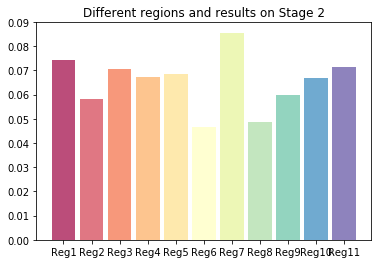

In [35]:
tmp[['REGION','label']]
#failure=tmp["REGION"= 4]["label"]
#success=len( tmp["label"] ) -failure
succ = [x- 0.75 for x in succ_rate]
x = np.arange(1,12)
plt.figure(figsize=(19,6)) #调节图形大小
fig, ax = plt.subplots()
labels = ["Reg%i" %s for s in np.arange(1,12)] #定义标签
index = np.arange(1,12)
#colors = ['tab:orange','tab:blue'] #每块颜色定义
colors = plt.cm.Spectral(np.linspace(0, 1, len(index)))
opacity = 0.7
rects1 = plt.bar(index, succ,alpha=opacity, width = 0.85, color=colors,label=labels)   
plt.xticks(x, labels)
plt.title("Different regions and results on Stage 2")
#plt.axis('equal')
plt.show()

### Wait Time

In [36]:
min_time = []
max_time = []
avg_time = []
for pppp in range(1,12):
    mintime = df.loc[df.REGION==pppp].DAYSWAIT_CHRON.min()
    maxtime = df.loc[df.REGION==pppp].DAYSWAIT_CHRON.max()
    avgtime = df.loc[df.REGION==pppp].DAYSWAIT_CHRON.sum()/len(df.loc[df.REGION==pppp].DAYSWAIT_CHRON)
    #print time_for_region
    #min_time = min(time_for_region)
    min_time.append(mintime)
    max_time.append(maxtime)
    avg_time.append(avgtime)
    #max_time = max(time_for_region)
    #avg_time = reduce(lambda x, y: x + y, time_for_region) / len(time_for_region)
    #wait_time.append([min_time, max_time, avg_time])

Text(0.5,1,u'Wait time for different regions')

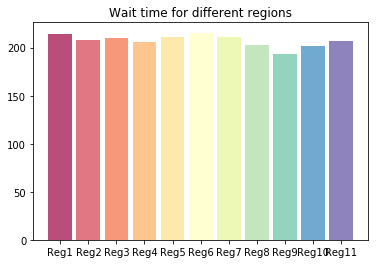

In [37]:
x = np.arange(1,12)
rects2 = plt.bar(index, avg_time,alpha=opacity, width = 0.85, color=colors,label=labels)   
plt.xticks(x, labels)
plt.title("Wait time for different regions")


In [38]:
min_time

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

In [39]:
max_time

[3427.0,
 3823.0,
 3926.0,
 4394.0,
 4374.0,
 3607.0,
 4326.0,
 3979.0,
 3000.0,
 3913.0,
 3615.0]

In [40]:
avg_time

[214.1449864498645,
 208.432324506095,
 209.6778013969025,
 206.01364799545067,
 211.5932910244787,
 215.54807692307693,
 211.20769014875106,
 202.46937296121783,
 193.35187969924812,
 202.21083995459705,
 207.1911146161935]

In [41]:
from sklearn.preprocessing import Imputer
impute=Imputer()
result=impute.fit_transform(tmp)
result=pd.DataFrame(result, columns=tmp.columns)
#x=result.iloc[:, :-1]
#y=result["label"]

## Normalization

In [42]:
normalized_df=(result-result.min())/(result.max()-result.min())
#result

In [43]:
#normalized_df

## Current Status

In [44]:
#normalized_df.describe().T['mean']

In [45]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27293 entries, 0 to 27292
Columns: 146 entries, NUM_PREV_TX to label
dtypes: float64(146)
memory usage: 30.4 MB


In [46]:
#normalized_df.to_csv("cleaned_liver.csv")

## Baseline:LR

In [47]:
x=normalized_df.iloc[:, :-1]
y=normalized_df["label"]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
s=['precision_macro', 'recall_macro']
lr=LogisticRegression()
scores = cross_validate(lr, x, y, scoring=s, cv=5)
scores

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([1.08505082, 1.46753001, 1.28354907, 1.15445995, 1.15879583]),
 'score_time': array([0.00839305, 0.01347399, 0.00884795, 0.00611091, 0.00701308]),
 'test_precision_macro': array([0.63084608, 0.70859919, 0.90848296, 0.74187439, 0.90869087]),
 'test_recall_macro': array([0.50143934, 0.50127573, 0.5005    , 0.50088787, 0.5015015 ]),
 'train_precision_macro': array([0.80863468, 0.80147309, 0.7244074 , 0.76156748, 0.75852653]),
 'train_recall_macro': array([0.50141627, 0.50129124, 0.50130413, 0.5013602 , 0.5007909 ])}

In [49]:
scores['test_precision_macro'].mean()

0.7796986975232211

In [50]:
scores['test_recall_macro'].mean()

0.5011208878759899

## Baseline: SVM

In [51]:
# from sklearn.svm import SVC
# s=['precision_macro', 'recall_macro']
# clf = SVC()
# scores = cross_validate(clf, x, y, scoring=s, cv=5)
# scores

In [52]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27293 entries, 0 to 27292
Columns: 146 entries, NUM_PREV_TX to label
dtypes: float64(146)
memory usage: 30.4 MB


## Clustering Model

In [53]:
don_df = []
for x in range(145):
    if "DON" in normalized_df.iloc[:,x].name:
        don_df.append(normalized_df.iloc[:,x].name)

In [54]:
don_df = normalized_df[don_df]

In [55]:
#don_df

In [56]:
rcp_df = []
for x in range(145):
    if "DON" not in normalized_df.iloc[:,x].name:
        rcp_df.append(normalized_df.iloc[:,x].name)

In [57]:
rcp_df = normalized_df[rcp_df]

In [58]:
rcp_df.drop(['label'],axis=1,inplace=True)

ValueError: labels ['label'] not contained in axis

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
#don_df.to_csv("don_data.csv")
#rcp_df.to_csv("rcp_data.csv")
#don_df.info()

In [61]:
from sklearn.decomposition import PCA
pcanumber = 10
dn_clusters = 8
rn_clusters = 8

In [62]:
pca = PCA(n_components=pcanumber, copy=True, whiten=False)  #设置属性
newData=pca.fit_transform(don_df)  #fit
# pp = 0
# for n in pca.explained_variance_ratio_:
#     pp+=n
# print pp

In [63]:
DON_train, DON_test, y_train, y_test = train_test_split(
     newData, y, test_size=0.2, random_state=42)

In [64]:
#pca.explained_variance_ratio_   #查看方差占比

In [65]:
#pca.explained_variance_  #查看方差

In [66]:
import matplotlib.colors  
cm = matplotlib.colors.ListedColormap(['royalblue', 'cyan',
                                  'yellow', 'orange', 'red', 'green', 'blue', 'm'])  
initp = np.array([[-0.6,-0.4],[0.5,-0.4],[-0.6,0.4],[-0.6,0.7],[-0.6,1.0],[0.5,0.4],[0.5,0.7],[0.5,1.0]])
from sklearn.cluster import KMeans  
model=KMeans(n_clusters=dn_clusters,init='k-means++')  #init = 'k-means++'
y_pre=model.fit_predict(newData)  

In [67]:
#pca3 = PCA(n_components=2, copy=True, whiten=False)  #设置属性
#toshow=pca3.fit_transform(newData)
model.inertia_

44055.44139281976

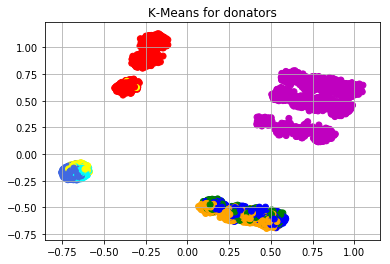

In [68]:
plt.scatter(newData[:,0],newData[:,1],c=y_pre,cmap=cm)  
plt.title('K-Means for donators')  
plt.grid()  
plt.show()  

In [69]:
# from sklearn.cluster import FeatureAgglomeration
# from sklearn.cluster import AgglomerativeClustering
# #algo = FeatureAgglomeration()
# agglo = AgglomerativeClustering(n_clusters=10)
# y_pred =agglo.fit_predict(don_df)
# print y_pred

In [70]:
pca2 = PCA(n_components=pcanumber, copy=True, whiten=False)
newData2=pca2.fit_transform(rcp_df)
RCP_train, RCP_test, y2_train, y_test = train_test_split(
     newData2, y, test_size=0.2, random_state=42)
initp2 = np.array([[-0.7,-0.4],[-0.7,0.8],[0,-0.6],[0,1],[0.7,-0.4],[0.7,1]])
model2=KMeans(n_clusters=rn_clusters,init='k-means++')  
y_pre2=model2.fit_predict(newData2)  

In [71]:
model2.inertia_

43373.45765245676

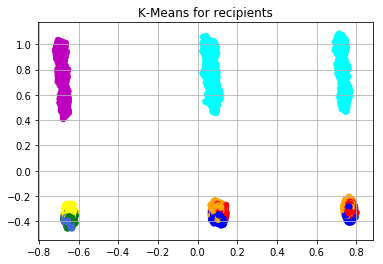

In [72]:
plt.scatter(newData2[:,0],newData2[:,1],c=y_pre2,cmap=cm)  
plt.title(u'K-Means for recipients')  
plt.grid()  
plt.show()  

In [73]:
print len(y_pre), len(y_pre2), len(normalized_df['label'])

27293 27293 27293


In [74]:
countdict = {}
for k in range(len(y_pre)):
    if (y_pre[k],y_pre2[k]) in countdict:
        countdict[(y_pre[k],y_pre2[k])]+=1
    else:
        countdict[(y_pre[k],y_pre2[k])]=1

In [75]:
#countdict

In [76]:
resultdict = {}
for k in range(len(y_pre)):
    if (y_pre[k],y_pre2[k]) in resultdict:
        resultdict[(y_pre[k],y_pre2[k])]+=normalized_df['label'][k]
    else:
        resultdict[(y_pre[k],y_pre2[k])]=1

In [77]:
finaldict = {
}

In [78]:
for k in resultdict:
    finaldict[k] = 1-(resultdict[k]/float(countdict[k]))

In [79]:
#finaldict

In [80]:
highp = {}
for k in finaldict:
    if k[0] in highp:
        if finaldict[k] > highp[k[0]]:
            highp[k[0]]=finaldict[k]
    else:
        highp[k[0]]=finaldict[k]

In [81]:
highcombinations = {}
for k in finaldict:
    if finaldict[k] == highp[k[0]]:
        highcombinations[k] = highp[k[0]]

In [82]:
highcombinations

{(0, 4): 0.8427672955974843,
 (1, 2): 0.8428571428571429,
 (2, 5): 0.8602620087336245,
 (3, 6): 0.8192307692307692,
 (4, 6): 0.8390977443609022,
 (5, 0): 0.8455598455598455,
 (6, 3): 0.8530259365994236,
 (7, 3): 0.848030018761726}

In [83]:
1-normalized_df['label'].mean() #This is baseline, lower than this-> bad match, higher than this-> good match

0.8168394826512293

In [84]:
#np.var(normalized_df['label']) #var

In [85]:
don_con = {}
for k in countdict:
    if k[0] in don_con:
        don_con[k[0]]+=countdict[k]
    else:
        don_con[k[0]]=countdict[k]

In [86]:
#don_con

In [87]:
don_result={}
for k in resultdict:
    if k[0] in don_result:
        don_result[k[0]]+=resultdict[k]
    else:
        don_result[k[0]]=resultdict[k]

In [88]:
#don_result

In [89]:
don_final = {}
for k in range(len(don_con)):
    don_final[k] = 1-don_result[k] / float(don_con[k])

In [90]:
don_final

{0: 0.8176958032611601,
 1: 0.8205445544554455,
 2: 0.8213944603629417,
 3: 0.8044889129259059,
 4: 0.8145017793594306,
 5: 0.8003240178209802,
 6: 0.822987721691678,
 7: 0.8188296264305766}

In [91]:
# catlist = [don_df,rcp_df]
# catresult = pd.concat(catlist,axis=1)
# catresult
# This is for concat on axis = 1

In [92]:
# catlist2 = [don_df.loc[[1,2,3]],don_df.loc[[4,5]]]
# catresult2 = pd.concat(catlist2)
# catresult2
# This is for concat on axis = 0

In [93]:
# keymap = {}
# for k in range(len(y_pre)):
#     if (y_pre[k],y_pre2[k]) in keymap:
#         keymap[(y_pre[k],y_pre2[k])].append(k)
#     else:
#         keymap[(y_pre[k],y_pre2[k])]=[k]


In [94]:
# newx = {}
# newy = {}
# for k in keymap:
#     concatlist = [don_df.loc[keymap[k]],rcp_df.loc[keymap[k]]]
#     newy[k] = (y[keymap[k]])
#     newx[k] = (pd.concat(concatlist,axis=1))

In [95]:
#for testy in newx:
#    print len(newx[testy])

In [96]:
# groupscores = {}
# ss=['precision_macro', 'recall_macro']
# for k in newx:
#     #lr=LogisticRegression()
#     clf = SVC()
#     groupscores[k] = (cross_validate(clf, newx[k], newy[k], scoring=ss, cv=5))

In [97]:
#groupscores

In [98]:
# prec_mean = []
# for k in groupscores:
#     prec_mean.append(groupscores[k]['test_precision_macro'].mean())
# sumprec = 0
# countprec = 0
# for num in prec_mean:
#     sumprec += num
#     countprec += 1
# print sumprec/float(countprec)

In [99]:
# recall_mean = []
# for k in groupscores:
#     recall_mean.append(groupscores[k]['test_recall_macro'].mean())
# sumprec = 0
# countprec = 0
# for num in recall_mean:
#     sumprec += num
#     countprec += 1
# print sumprec/float(countprec)

In [100]:
highcombinations

{(0, 4): 0.8427672955974843,
 (1, 2): 0.8428571428571429,
 (2, 5): 0.8602620087336245,
 (3, 6): 0.8192307692307692,
 (4, 6): 0.8390977443609022,
 (5, 0): 0.8455598455598455,
 (6, 3): 0.8530259365994236,
 (7, 3): 0.848030018761726}

Before: 91.2%



In [101]:
highcount = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]) in highcombinations:
        #print (y_pre[k],y_pre2[k])
        highcount += 1
highresult = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]) in highcombinations:
        highresult += normalized_df['label'][k]
finalhigh = 1- highresult/float(highcount)
print finalhigh

0.8341013824884793


In [102]:
lowcount = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]) not in highcombinations:
        #print (y_pre[k],y_pre2[k])
        lowcount += 1
lowresult = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]) not in highcombinations:
        lowresult += normalized_df['label'][k]
finallow = 1- lowresult/float(lowcount)
print finallow

0.8236272878535773


In [103]:
regcount = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]): #not in highcombinations:
        #print (y_pre[k],y_pre2[k])
        regcount += 1
regresult = 0
for k in range(len(y_pre))[2::5]:
    if (y_pre[k],y_pre2[k]): #not in highcombinations:
        regresult += normalized_df['label'][k]
finalreg = 1- regresult/float(regcount)
print finalreg

0.824876350980033


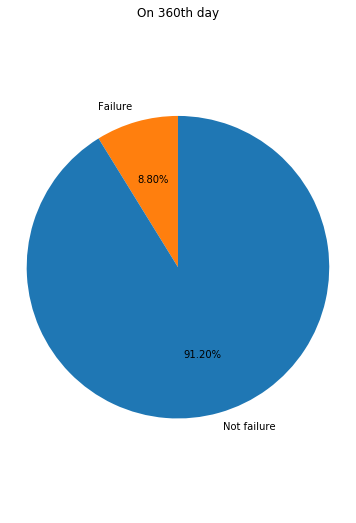

In [104]:
failure=tmp["label"].sum()
success=len( tmp["label"] ) -failure

plt.figure(figsize=(6,9)) #调节图形大小
labels = ['Failure','Not failure'] #定义标签
sizes = [0.088, 0.912] #每块值
colors = ['tab:orange','tab:blue'] #每块颜色定义
explode = (0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance =0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.title("On 360th day")
plt.axis('equal')
plt.show()

## Granularity
Let's focus on granularity
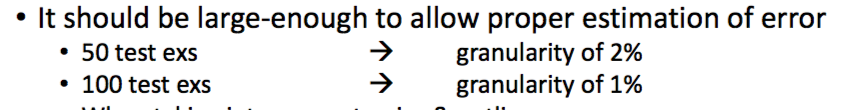
### So ideally, we want around or more than 500 surgeries for each cluster-match!  
> PCA, K-means, Hierarchical  
> Can't have too many clusters then
>   33000/500 = 66, that means a*b with 6<=a<=8 and 6<=b<=8

### Also, we want K not too small

<b>Dimensions</b>: 10, 20, 30  
<b>K-Donator</b>: 6 - 8  
<b>K-Recipient</b>: 6 - 8  

## Encapsulation for Test!

In [105]:
def TestFunction(pca_number, don_clusters,rcp_clusters): 
    sum_finalhigh = 0
    sum_bestmatch = 0
    for x in range(10):
        pcanumber = pca_number
        dn_clusters = don_clusters
        rn_clusters = rcp_clusters
        pca = PCA(n_components=pcanumber, copy=True, whiten=False)  #设置属性
        newData = pca.fit_transform(don_df)  #fit
        DON_train, DON_test, y_train, y_test = train_test_split(
             newData, y, test_size=0.2, random_state=42)
        model = KMeans(n_clusters=dn_clusters,init='k-means++')  #init = 'k-means++'
        y_pre = model.fit_predict(newData)  
        
        pca2 = PCA(n_components=pcanumber, copy=True, whiten=False)
        newData2 = pca2.fit_transform(rcp_df)
        RCP_train, RCP_test, y2_train, y_test = train_test_split(
         newData2, y, test_size=0.2, random_state=42)
        #initp2 = np.array([[-0.7,-0.4],[-0.7,0.8],[0,-0.6],[0,1],[0.7,-0.4],[0.7,1]])
        model2 = KMeans(n_clusters=rn_clusters,init='k-means++')  
        y_pre2 = model2.fit_predict(newData2) 

        countdict = {}
        for k in range(len(y_pre)):
            if (y_pre[k],y_pre2[k]) in countdict:
                countdict[(y_pre[k],y_pre2[k])]+=1
            else:
                countdict[(y_pre[k],y_pre2[k])]=1
        resultdict = {}
        for k in range(len(y_pre)):
            if (y_pre[k],y_pre2[k]) in resultdict:
                resultdict[(y_pre[k],y_pre2[k])] += normalized_df['label'][k]
            else:
                resultdict[(y_pre[k],y_pre2[k])] = normalized_df['label'][k] 
        finaldict = {}
        for k in resultdict:
            finaldict[k] = 1-(resultdict[k]/float(countdict[k]))
        highp = {}
        for k in finaldict:
            if k[0] in highp:
                if finaldict[k] > highp[k[0]]:
                    highp[k[0]]=finaldict[k]
            else:
                highp[k[0]]=finaldict[k]
        highcombinations = {}
        for k in finaldict:
            if finaldict[k] == highp[k[0]]:
                highcombinations[k] = highp[k[0]]
        don_con = {}
        for k in countdict:
            if k[0] in don_con:
                don_con[k[0]]+=countdict[k]
            else:
                don_con[k[0]]=countdict[k]
        don_result={}
        for k in resultdict:
            if k[0] in don_result:
                don_result[k[0]]+=resultdict[k]
            else:
                don_result[k[0]]=resultdict[k]
        don_final = {}
        for k in range(len(don_con)):
            don_final[k] = 1-don_result[k] / float(don_con[k])
        don_final
        highcount = 0
        highresult = 0
        lowcount = 0
        lowresult = 0
        for k in range(len(y_pre)/5):
            random_surgery = np.random.randint(0,len((y_pre)))
            if (y_pre[random_surgery],y_pre2[random_surgery]) in highcombinations:
                #print (y_pre[k],y_pre2[k])
                highcount += 1
                highresult += normalized_df['label'][random_surgery]
            elif (y_pre[random_surgery],y_pre2[random_surgery]) not in highcombinations:
                lowcount += 1
                lowresult += normalized_df['label'][random_surgery]
        finalhigh = 1- highresult/float(highcount)
        finallow = 1- lowresult/float(lowcount)
        sum_finalhigh += finalhigh
        sum_bestmatch += highcombinations[max(highcombinations, key = highcombinations.get)]
    print "For Dimensions = ",pca_number,"Donator Cluster# = ", don_clusters, "Recipient Cluster# = ", rcp_clusters
    print "Not Failure Rate(NFR) for preferred match: ", sum_finalhigh/10.0
    print "Baseline: ",1-normalized_df['label'].mean() #This is baseline, lower than this-> bad match, higher than this-> good match
    print "NFR for best match: ",sum_bestmatch/10.0
    print "Number of match: ", len(resultdict)
    print "Min count for match: ",countdict[min(countdict, key=countdict.get)]

In [106]:
# for n_pca in range(10,40,10):
#     for n_don in range(6,9):
#         for n_rcp in range(6,9):
#             TestFunction(n_pca, n_don, n_rcp)

n_pca = 10
for n_don in range(9,11):
    for n_rcp in range(9,11):
        TestFunction(n_pca, n_don, n_rcp)

In [107]:
n_pca = 10
n_don = 8
n_rcp = 8
TestFunction(n_pca, n_don, n_rcp)

For Dimensions =  10 Donator Cluster# =  8 Recipient Cluster# =  8
Not Failure Rate(NFR) for preferred match:  0.8416927887567816
Baseline:  0.8168394826512293
NFR for best match:  0.8627504999211743
Number of match:  64
Min count for match:  148


In [108]:
don_final

{0: 0.8176958032611601,
 1: 0.8205445544554455,
 2: 0.8213944603629417,
 3: 0.8044889129259059,
 4: 0.8145017793594306,
 5: 0.8003240178209802,
 6: 0.822987721691678,
 7: 0.8188296264305766}

<module 'pandas' from '/Library/Python/2.7/site-packages/pandas/__init__.pyc'>